# 2. Modeling and Ensembling

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')


In [3]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

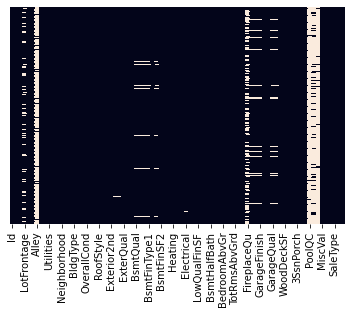

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

df.drop(['Alley'],axis=1,inplace=True)

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

df.drop(['GarageYrBlt'],axis=1,inplace=True)

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

df.drop(['Id'],axis=1,inplace=True)

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])

df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())

df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())

df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())

df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())

df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])

df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])

df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])

df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())

df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])


In [8]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [9]:
df.shape

(1460, 75)

# Categorical features

In [10]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [11]:
len(columns)

39

In [12]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [13]:
main_df=df.copy()


In [14]:
test_df=pd.read_csv('formulatedtest.csv')


In [15]:
test_df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [16]:
final_df=pd.concat([df,test_df],axis=0)

    

In [17]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [18]:
final_df['SalePrice']


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

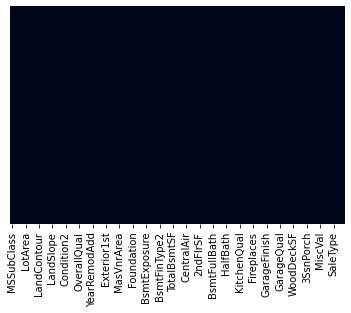

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [20]:
df.shape

(1460, 75)

In [21]:
test_df.shape

(1459, 74)

In [22]:
final_df=category_onehot_multcols(columns)


MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [23]:
final_df.shape


(2919, 236)

In [24]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [25]:
final_df.shape

(2919, 176)

In [26]:
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,1,1,0,0,0,0,0,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,1,0,0,0,1,0,0,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,1,1,0,0,0,0,0,0


In [27]:
df.shape

(1460, 75)

In [28]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [29]:
df_Train.shape

(1460, 176)

In [30]:
df_Test.shape

(1459, 176)

In [31]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [32]:

X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Modeling

# Random Forest Regressor (PS:0.14833)

In [33]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

X_test = df_Test


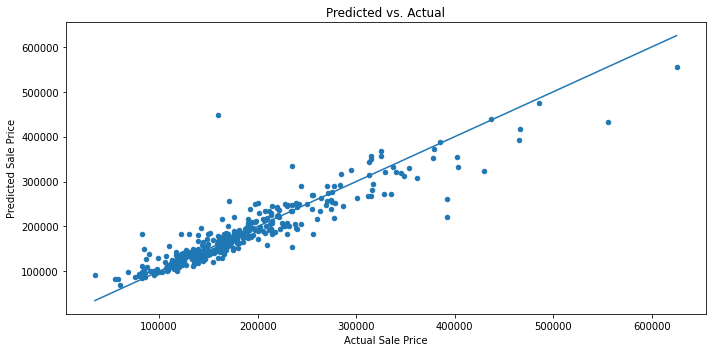

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model_rf.fit(X_train1, y_train1)
rf_pred = model_rf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [35]:

model_rf.fit(X_train, y_train)
rf_pred_log = model_rf.predict(X_test)

In [36]:
rf_pred_log



array([128215.152, 155334.248, 181973.73 , ..., 156096.19 , 115158.492,
       235251.638])

In [37]:
sample=pd.read_csv('sample_submission.csv')
sample.shape

(1459, 2)

In [38]:
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':rf_pred_log})
submission.tail(1)


,Id,SalePrice
1458,2919,235251.638


In [39]:
submission.to_csv("1.csv", index=False)


# Ridge Regressor (PS:0.15857)

In [40]:
from sklearn.linear_model import Ridge, RidgeCV


In [41]:
model_rige = Ridge()
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 7))
    return(rmse)

In [42]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [43]:
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
rmse_cv(model_ridge).mean()

33798.61645257954

In [44]:
y_test_pred_log = model_ridge.predict(X_test)
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':y_test_pred_log})
submission.to_csv("2.csv", index=False)

# Lasso (PS:0.20069)

In [45]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [46]:
lasso_pred_log = model_lasso.predict(X_test)
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':lasso_pred_log})
submission.to_csv("3.csv", index=False)


# XG boost (PS:0.13743)

In [47]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

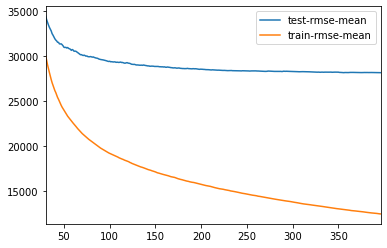

In [48]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [49]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, y_train)

[04:57:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [50]:
xgb_preds_log = model_xgb.predict(X_test)
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':xgb_preds_log})
submission.to_csv("4.csv", index=False)

# Gradient Boosting Regrssor (PS:0.23286)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_gbm = GradientBoostingRegressor(**params)
model_gbm.fit(X_train, y_train)
rmse_cv(model_gbm).mean()

41707.36987781477

In [52]:
gbm_preds_log = model_gbm.predict(X_test)
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':gbm_preds_log})
submission.to_csv("5.csv", index=False)

# Ensembling

In [53]:
pred_rd = model_rf.predict(X_test)
pred_lasso = model_lasso.predict(X_test)
pred_ridge = model_ridge.predict(X_test)
pred_xgb = model_xgb.predict(X_test)

predictions = pd.DataFrame({"rf":pred_rd, 
                            "lasso":pred_lasso, 
                            "ridge":pred_ridge,
                            "xgb": pred_xgb})
predictions.head()

,rf,lasso,ridge,xgb
0,128215.152,127955.884472,116833.686606,118574.523438
1,155334.248,169880.493963,150140.784510,158619.578125
2,181973.730,185446.810742,173770.505522,182243.953125
3,182459.906,190419.473775,185899.222868,187933.578125
4,198619.902,212177.039986,211576.260488,200470.812500


# rd + lasso (PS:0.13680)

In [54]:
pred_ensemble_rf_lasso = 0.7*pred_rd + 0.3*pred_lasso
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':pred_ensemble_rf_lasso})
submission.to_csv("6.csv", index=False)

# rd+ridge (PS:0.13435)

In [55]:
pred_ensemble_rf_ridge = 0.7*pred_rd + 0.3*pred_ridge
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':pred_ensemble_rf_ridge})
submission.to_csv("7.csv", index=False)

# rd+xg(PS:0.13602)

In [56]:
pred_ensemble_rf_xgb = 0.4*pred_rd + 0.6*pred_xgb
submission = pd.DataFrame({'Id':sample['Id'], 'SalePrice':pred_ensemble_rf_xgb})
submission.to_csv("8.csv", index=False)